In [8]:
# ![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# # Predict TripAdvisor Rating
# ## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
# **По ходу задачи:**
# * Прокачаем работу с pandas
# * Научимся работать с Kaggle Notebooks
# * Поймем как делать предобработку различных данных
# * Научимся работать с пропущенными данными (Nan)
# * Познакомимся с различными видами кодирования признаков
# * Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
# * И совсем немного затронем ML
# * И многое другое...
#
#
#
# ### И самое важное, все это вы сможете сделать самостоятельно!
#
# *Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*
# Вы можете использовать его как основу для построения своего решения.
#
# > что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.
# **baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи.
# Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь)
#
# В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

In [9]:
# # import

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./input\kaggle_task.csv
./input\main_task.csv
./input\sample_submission.csv


In [11]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [12]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [13]:
# # DATA

In [14]:
DATA_DIR = 'input/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [16]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [18]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [19]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [20]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [21]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [23]:
# Подробнее по признакам:
# * City: Город
# * Cuisine Style: Кухня
# * Ranking: Ранг ресторана относительно других ресторанов в этом городе
# * Price Range: Цены в ресторане в 3 категориях
# * Number of Reviews: Количество отзывов
# * Reviews: 2 последних отзыва и даты этих отзывов
# * URL_TA: страница ресторана на 'www.tripadvisor.com'
# * ID_TA: ID ресторана в TripAdvisor
# * Rating: Рейтинг ресторана

In [24]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
8484,id_8484,London,"['Cafe', 'British', 'Gluten Free Options']",7948.0,$$ - $$$,80.0,"[['Amazing brunch, wonderful cakes, great cof....",/Restaurant_Review-g186338-d4129260-Reviews-An...,d4129260,0,0.0
43578,id_11734,London,['Chinese'],11744.0,NaN,5.0,"[['Saaaaaaaaaalty!', 'Wonderful place'], ['08/...",/Restaurant_Review-g186338-d4925534-Reviews-Ha...,d4925534,1,4.0
33072,id_5224,Rome,NaN,5225.0,NaN,3.0,"[['Great Bar', 'Great Cafe and Snacks'], ['12/...",/Restaurant_Review-g187791-d12832311-Reviews-C...,d12832311,1,5.0
17691,id_995,London,"['Seafood', 'British']",997.0,$,255.0,"[['reading Tripadvisor led me here', 'YOU SHOU...",/Restaurant_Review-g186338-d10663214-Reviews-P...,d10663214,1,4.0
17241,id_1706,Dublin,['Wine Bar'],1710.0,$$ - $$$,13.0,"[['Fantastic', 'Awful experience!!!!'], ['07/1...",/Restaurant_Review-g186605-d8490194-Reviews-Re...,d8490194,1,3.5


In [25]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [26]:
# Как видим, большинство признаков у нас требует очистки и предварительной обработки.

In [27]:
# # Cleaning and Prepping Data
# Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.
# ![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

In [28]:
# ## 1. Обработка NAN
# У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**
# По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак

In [29]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [30]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [31]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [32]:
# ### 2. Обработка признаков
# Для начала посмотрим какие признаки у нас могут быть категориальными.

In [33]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

In [34]:
# Какие признаки можно считать категориальными?

In [35]:
# Для кодирования категориальных признаков есть множество подходов:
# * Label Encoding
# * One-Hot Encoding
# * Target Encoding
# * Hashing
#
# Выбор кодирования зависит от признака и выбраной модели.
# Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
# ![](https://i.imgur.com/mtimFxh.png)

In [36]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [37]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
14098,id_5604,"['Lebanese', 'Mediterranean', 'Vegetarian Frie...",5605.0,$,36.0,"[['Excellent shawarma and kibbeh', 'Good sandw...",/Restaurant_Review-g187147-d802704-Reviews-Le_...,d802704,1,4.5,...,0,0,1,0,0,0,0,0,0,0
13333,id_2804,NaN,2806.0,NaN,7.0,"[['real italian coffee', 'Great location'], ['...",/Restaurant_Review-g190454-d7705085-Reviews-Pa...,d7705085,1,3.5,...,0,0,0,0,0,0,1,0,0,0
4545,id_4545,"['Japanese', 'Sushi']",1697.0,$$ - $$$,25.0,"[['Good sushi', 'Good value for good price'], ...",/Restaurant_Review-g274856-d4307957-Reviews-Kw...,d4307957,0,0.0,...,0,0,0,0,0,0,0,1,0,0
19417,id_1329,"['Mexican', 'Latin', 'Street Food', 'Central A...",1330.0,$,53.0,"[['Stopped for a taco a Pacífico', 'My favorit...",/Restaurant_Review-g187497-d12336099-Reviews-M...,d12336099,1,4.5,...,0,0,0,0,0,0,0,0,0,0
42969,id_2950,"['Brew Pub', 'Pub']",2953.0,NaN,4.0,"[[], []]",/Restaurant_Review-g189158-d4041851-Reviews-Le...,d4041851,1,4.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# #### Возьмем следующий признак "Price Range".

In [40]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [41]:
# По описанию 'Price Range' это - Цены в ресторане.
# Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3
# *Попробуйте сделать обработку этого признака уже самостоятельно!*

In [42]:
# Ваша обработка 'Price Range'

def to_int(range):
    if range == '$':
        return 1
    elif range == '$$ - $$$':
        return 2
    elif range == '$$$$':
        return 3
    else:
        return 0
data['Price Range'] = data['Price Range'].apply(to_int)

In [43]:
# > Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [44]:
# ### Обработать другие признаки вы должны самостоятельно!
# Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!
# Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [45]:
# тут ваш код на обработку других признаков

def split_review(cell):
    try:
        arr = cell.split('],[')
        if len(arr) == 1:
            arr = cell.split('], [')
        if len(arr) != 2:
            print('Error')
        return arr
    except:
        return '[], []'

def clear_data_and_convert_to_array(value: str):
    cleared = value.replace(']', '').replace('[', '')\
        .replace("'", '')
    arr = cleared.split(',')
    result = []
    for item in arr:
        if item != '':
            result.append(item.lstrip(' '))
    if len(result) == 0:
        result.append('')
        result.append('')
    elif len(result) == 1:
        result.append('')

    return result

def convert_to_date(arr):
    result = []
    for item in arr:
        try:
            result.append(datetime.strptime(item, '%m/%d/%Y'))
        except:
            pass
    return result

In [46]:
data['Reviews']

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 50000, dtype: object

In [47]:
data_of_review = data['Reviews']\
    .apply(split_review)\
    .apply(lambda x: x[1])\
    .apply(clear_data_and_convert_to_array)\
    .apply(convert_to_date)

data_of_review

0                                                []
1        [2017-12-05 00:00:00, 2017-10-29 00:00:00]
2        [2017-12-28 00:00:00, 2017-12-06 00:00:00]
3        [2017-12-06 00:00:00, 2017-11-22 00:00:00]
4        [2018-02-08 00:00:00, 2018-01-24 00:00:00]
                            ...                    
49995    [2017-12-16 00:00:00, 2017-11-12 00:00:00]
49996    [2017-12-21 00:00:00, 2017-12-12 00:00:00]
49997    [2016-11-03 00:00:00, 2008-04-12 00:00:00]
49998    [2017-07-11 00:00:00, 2017-06-18 00:00:00]
49999    [2016-01-31 00:00:00, 2012-07-04 00:00:00]
Name: Reviews, Length: 50000, dtype: object

In [48]:
def get_max_date(arr):
    interval = 0
    if len(arr) == 2:
        interval = abs(arr[0] - arr[1]).days

    return interval

In [49]:
data['Between to reviews'] = data_of_review.apply(get_max_date)

In [50]:
data['Review1 simbols'] = data['Reviews']\
    .apply(split_review)\
    .apply(lambda x: x[0])\
    .apply(clear_data_and_convert_to_array)\
    .apply(lambda x: x[0])\
    .apply(lambda x: len(x))\

In [51]:
data['Review2 simbols'] = data['Reviews']\
    .apply(split_review)\
    .apply(lambda x: x[0])\
    .apply(clear_data_and_convert_to_array)\
    .apply(lambda x: x[1])\
    .apply(lambda x: len(x))\

In [52]:
cuisines_as_list = data['Cuisine Style']\
    .apply(lambda x: str(x).replace('[', '')
           .replace(']', '').replace("'", '')
           .replace(" ", '').replace('nan', ''))\
    .apply(lambda x: list(set(x.split(','))))

In [53]:
data['Cuisine Style'] = cuisines_as_list

In [54]:
#делаем dummy колонки по кухням
cuisines = pd.get_dummies(cuisines_as_list.apply(pd.Series).stack()).sum(level=0)

In [55]:
data = pd.concat([data, cuisines], axis=1)
data = data.drop(columns=['Cuisine Style'])

In [56]:
data['Restaurant_id'] = data['Restaurant_id'].apply(lambda x: int(x.replace('id_', '')))

In [57]:
data = data.drop(columns=['Reviews', 'URL_TA', 'ID_TA'])

In [58]:
data.head(1)

,Restaurant_id,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,...,Ukrainian,Uzbek,VeganOptions,VegetarianFriendly,Venezuelan,Vietnamese,Welsh,WineBar,Xinjiang,Yun
0,0,12963.0,2,4.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# ![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

In [60]:
# # EDA
# [Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
# На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
# В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
# Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
# ![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

In [61]:
# ### Посмотрим распределение признака

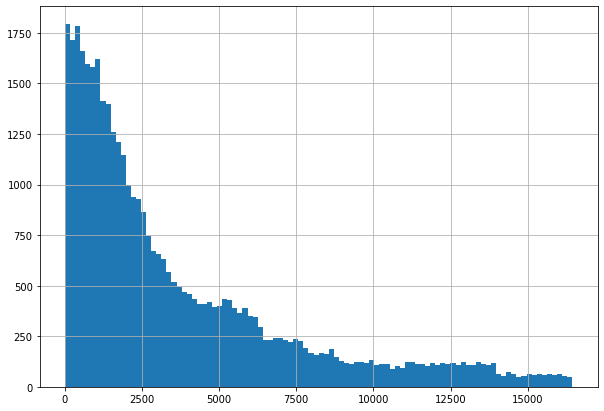

In [62]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

In [63]:
# У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

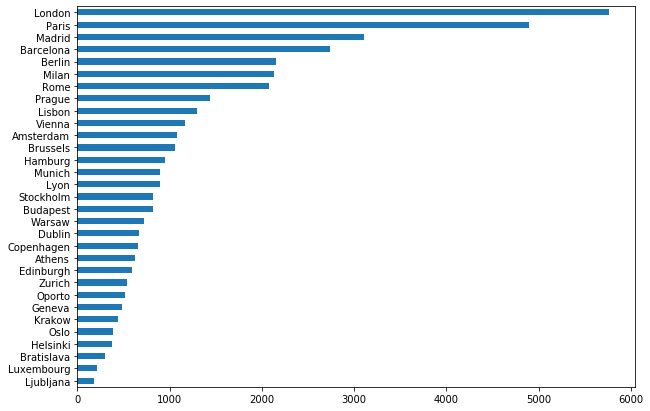

In [64]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

In [65]:
# А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

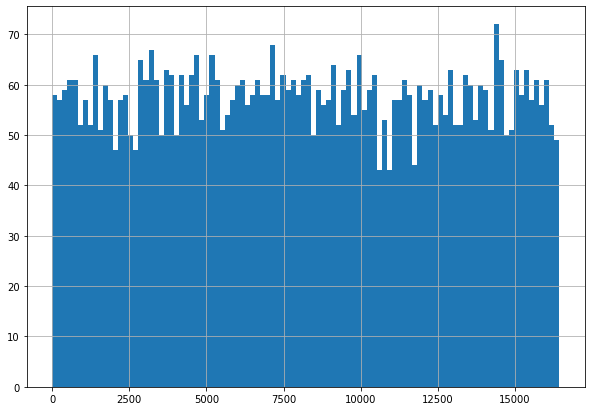

In [66]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

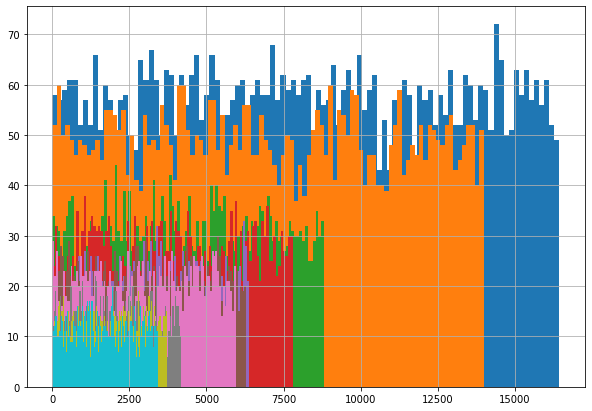

In [67]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

In [68]:
# Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.
#
# >Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =)
#

In [69]:
# ### Посмотрим распределение целевой переменной

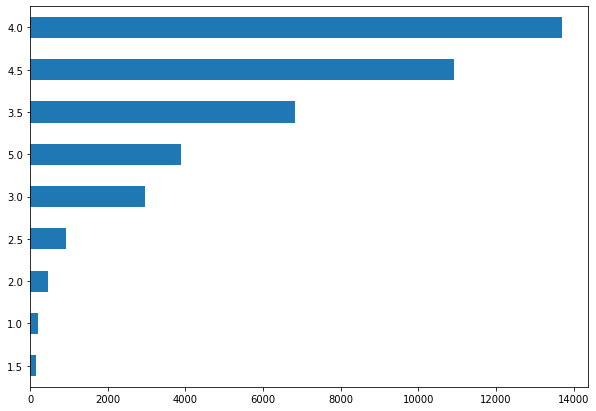

In [70]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

In [71]:
# ### Посмотрим распределение целевой переменной относительно признака

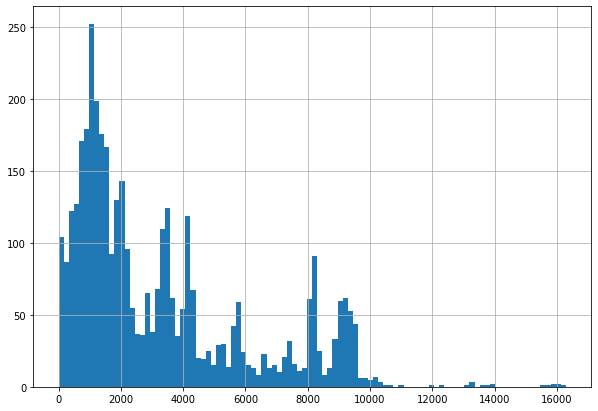

In [72]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

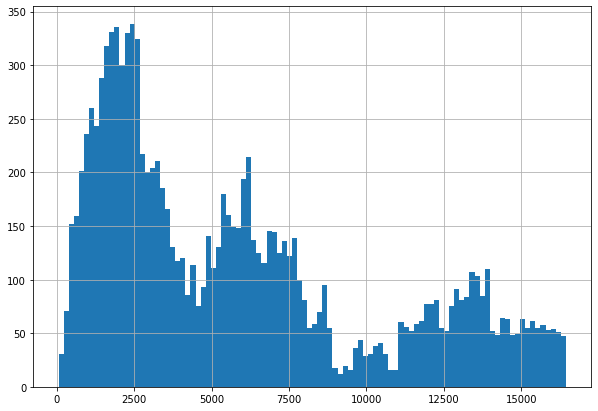

In [73]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

In [74]:
# ### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
# На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

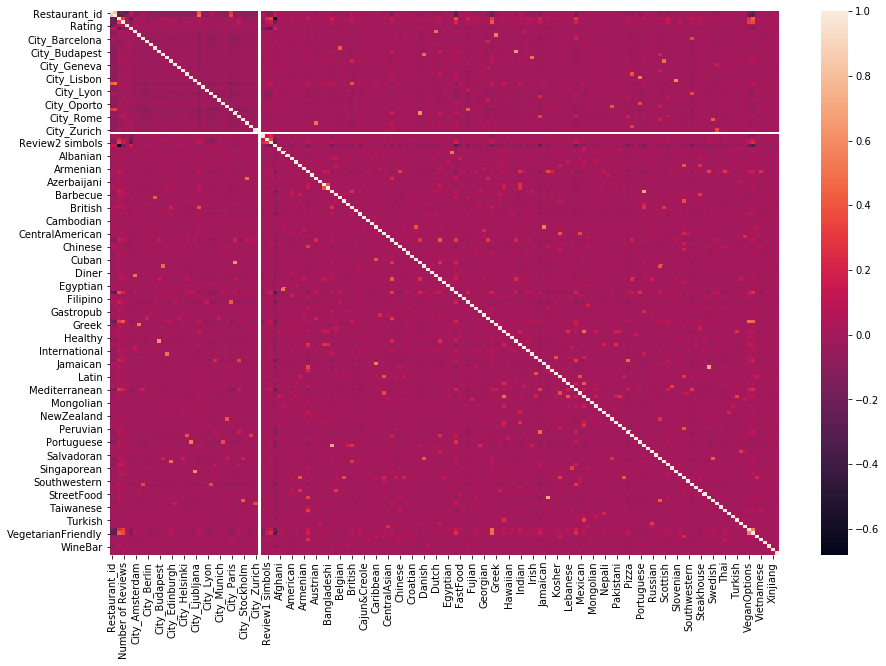

In [75]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [76]:
# Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
# * где больше Пицерий в Мадриде или Лондоне?
# * в каком городе кухня ресторанов более разнообразна?
#
# придумайте свои вопрос и найдите на него ответ в данных)

In [77]:
df_preproc = data
df_preproc.sample(10)

,Restaurant_id,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,...,Ukrainian,Uzbek,VeganOptions,VegetarianFriendly,Venezuelan,Vietnamese,Welsh,WineBar,Xinjiang,Yun
40795,987,988.0,2,776.0,1,4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2543,2543,12566.0,0,28.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24392,405,406.0,3,2207.0,1,4.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
39000,36,37.0,2,486.0,1,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40405,6228,6232.0,2,329.0,1,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25528,499,500.0,2,3.0,1,4.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25642,6059,6060.0,0,3.0,1,3.5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9792,9792,2608.0,2,45.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46843,5846,5847.0,3,0.0,1,4.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17603,1638,1641.0,0,6.0,1,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 168 entries, Restaurant_id to Yun
dtypes: float64(3), int64(6), uint8(159)
memory usage: 11.0 MB


In [79]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [80]:
# **Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации.
# Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [81]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [82]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 167), (40000, 167), (40000, 166), (32000, 166), (8000, 166))

In [83]:
# # Model
# Сам ML

In [84]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [85]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [86]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [87]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21339625


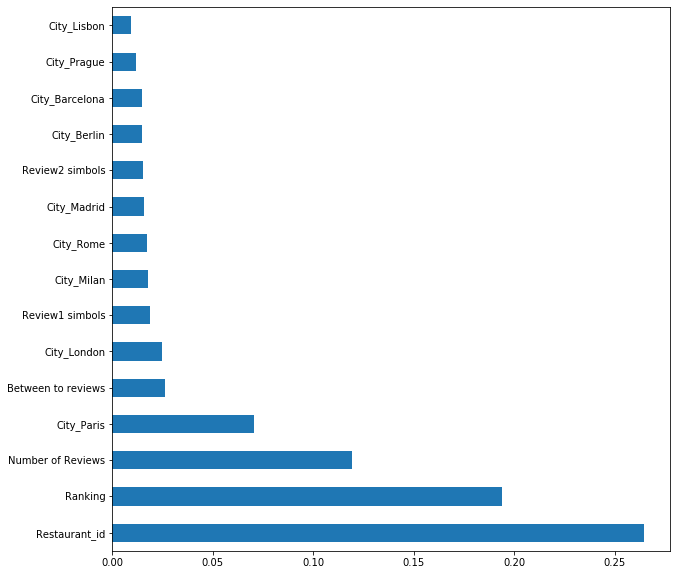

In [88]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [89]:
# # Submission
# Если все устраевает - готовим Submission на кагл

In [90]:
test_data.sample(10)

,Restaurant_id,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,Ukrainian,Uzbek,VeganOptions,VegetarianFriendly,Venezuelan,Vietnamese,Welsh,WineBar,Xinjiang,Yun
9585,9585,4699.0,1,36.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4575,4575,6162.0,0,12.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,4915,8001.0,2,48.0,0.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
9445,9445,4539.0,2,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,473,693.0,2,158.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8913,8913,5514.0,0,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5818,5818,181.0,1,129.0,0.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4626,4626,230.0,2,299.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1447,1447,1112.0,0,4.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6611,6611,2968.0,1,28.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
test_data = test_data.drop(['Rating'], axis=1)

In [92]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [93]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [94]:
predict_submission

array([4.395, 4.33 , 4.53 , ..., 2.63 , 3.225, 4.09 ])

In [95]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,4.395
1,id_1,4.330
2,id_2,4.530
3,id_3,4.415
4,id_4,4.490
5,id_5,4.590
6,id_6,4.130
7,id_7,3.855
8,id_8,4.590
9,id_9,4.635


In [96]:
# # What's next?
# Или что делать, чтоб улучшить результат:
# * Обработать оставшиеся признаки в понятный для машины формат
# * Посмотреть, что еще можно извлечь из признаков
# * Сгенерировать новые признаки
# * Подгрузить дополнительные данные, например: по населению или благосостоянию городов
# * Подобрать состав признаков
#
# В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
#